# Scooterella Project

**Scooterella** is a company that operates in the electric scooter rental business. After most of the
COVID-19 lockdowns have been lifted, **Scooterella** wants to get back to business with an aggressive
**marketing campaign**. We want to identify clusters (or groups) of customers so that Scooterella can design a specific marketing strategy for each cluster.

In [35]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import seaborn as sns

 The dataset (MarketSegmentation.csv) contains data related to trips represented using the following seven variables:
 - **female**: the user is female (1 if yes, 0 if no).
 - **age**: the age of the user (years).
 - **duration**: the time of the trip, in seconds
 - **morning**: the trip started between 6:00am and 12:00pm (1 if yes, 0 if no).
 - **afternoon**: the trip started between 12:00pm and 6:00pm (1 if yes, 0 if no).
 - **evening**: the trip started between 6:00pm and 12:00am (1 if yes, 0 if no).
 - **weekend_day**: the trip started on Saturday or Sunday (1 if yes, 0 if no).


In [36]:
# load dataset
df = pd.read_csv("MarketSegmentation.csv")
df.head()

,duration,morning,afternoon,evening,age,weekend_day,female
0,212,0,1,0,17,0,0
1,229,0,1,0,17,0,0
2,259,0,0,1,17,1,1
3,273,0,1,0,17,0,0
4,279,0,1,0,17,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185190 entries, 0 to 185189
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   duration     185190 non-null  int64
 1   morning      185190 non-null  int64
 2   afternoon    185190 non-null  int64
 3   evening      185190 non-null  int64
 4   age          185190 non-null  int64
 5   weekend_day  185190 non-null  int64
 6   female       185190 non-null  int64
dtypes: int64(7)
memory usage: 9.9 MB


In [6]:
df.describe()

,duration,morning,afternoon,evening,age,weekend_day,female
count,185190.000000,185190.000000,185190.000000,185190.000000,185190.000000,185190.000000,185190.000000
mean,721.550964,0.326146,0.399703,0.249819,35.373098,0.170101,0.262892
std,1249.809447,0.468803,0.489839,0.432909,10.994772,0.375723,0.440206
min,180.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,377.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
50%,562.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000
75%,860.000000,1.000000,1.000000,0.000000,42.000000,0.000000,1.000000
max,85040.000000,1.000000,1.000000,1.000000,78.000000,1.000000,1.000000


In [7]:
# check for NaN values
df.isnull().any()

duration       False
morning        False
afternoon      False
evening        False
age            False
weekend_day    False
female         False
dtype: bool

 **1.a)**  Why is it important to normalize data and what do you expect to happen in your
analysis if variables are not normalized?

Normalizing the features is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.
For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without normalization will give the variable with the larger range, weight of 1000 in the analysis.





**1.b)** Process the variables so that each variable has mean 0 and standard deviation 1.

In [37]:
# Since it's useless to standardize categorical features I standardize only the continous features: duration and age
sc_x = StandardScaler()
df['duration'] = sc_x.fit_transform(df[['duration']])
df['age'] = sc_x.fit_transform(df[['age']])
df.head()

,duration,morning,afternoon,evening,age,weekend_day,female
0,-0.407704,0,1,0,-1.67108,0,0
1,-0.394102,0,1,0,-1.67108,0,0
2,-0.370098,0,0,1,-1.67108,1,1
3,-0.358896,0,1,0,-1.67108,0,0
4,-0.354096,0,1,0,-1.67108,0,1


After scaling I want to see if we can get rid of some not informative features with **Principal Component Analysis**.  

**PCA** has 2 step:
- **Decorrelation**( by rotating data samples to be aligned with axes and then shifting them to have mean 0)
- **Reduces dimension**(by choosing features with significance variance)

<BarContainer object of 7 artists>

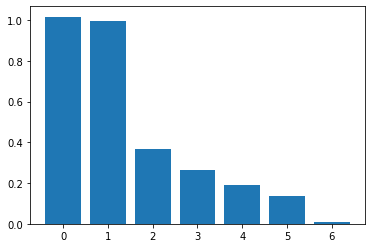

In [38]:
pca = PCA()
pca.fit(df)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

Choosing instrinsic dimension is an idealization, since there isn't always one correct answer.

In this case I decide to stick with all features but **'female'**

In [39]:
del df['female']
df.head()

,duration,morning,afternoon,evening,age,weekend_day
0,-0.407704,0,1,0,-1.67108,0
1,-0.394102,0,1,0,-1.67108,0
2,-0.370098,0,0,1,-1.67108,1
3,-0.358896,0,1,0,-1.67108,0
4,-0.354096,0,1,0,-1.67108,0


**2)** Use a clustering algorithm on your normalized dataset. Your boss suggests that **10 clusters**
should be created.

Since we are in **UNsupervised learning** we can choose from **k-means** and **hierarchical clustering**. However the latter is computationally very heavy, so I chose **k-means**.

In [40]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

**2.a)** How many observations are in each cluster?

In [41]:
dic_10 = {}
for i in range(0,10):
    dic_10[i] = np.count_nonzero(y_kmeans == i)
dic_10

{0: 12729,
 1: 21621,
 2: 35407,
 3: 100,
 4: 20665,
 5: 15072,
 6: 38899,
 7: 564,
 8: 29579,
 9: 10554}

**2.b/c/d** Compare the clusters by looking at the mean values of the variables (cluster
centroids).

Are there any clusters that you think may be more interesting than others?

Looking at the obtained results, do you think it may be useful to perform a different
market segmentation by increasing or by decreasing the number (K) of clusters to be
generated?

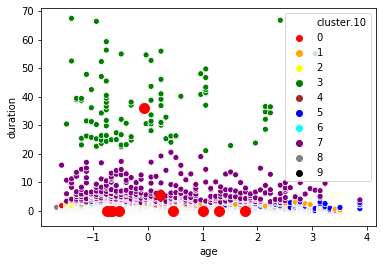

In [42]:
# add clusters to the dataset
df['cluster.10'] = y_kmeans

color = ['red', 'orange', 'yellow', 'green', 'brown', 'blue', 'cyan', 'purple', 'grey', 'black']

sns.scatterplot(df['age'], df['duration'], hue = df['cluster.10'], palette = color)

# Plotting cluster centers
# 'kmeans.cluster_centers_[0][[4,0]]' 1st centroid with x = 'age'(4) and y = 'duration'(0)
plt.scatter(kmeans.cluster_centers_[0][[4,0]][0],kmeans.cluster_centers_[0][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[1][[4,0]][0],kmeans.cluster_centers_[1][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[2][[4,0]][0],kmeans.cluster_centers_[2][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[3][[4,0]][0],kmeans.cluster_centers_[3][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[4][[4,0]][0],kmeans.cluster_centers_[4][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[5][[4,0]][0],kmeans.cluster_centers_[5][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[6][[4,0]][0],kmeans.cluster_centers_[6][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[7][[4,0]][0],kmeans.cluster_centers_[7][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[8][[4,0]][0],kmeans.cluster_centers_[8][[4,0]][1] , marker='o', s=100, color = 'red')
plt.scatter(kmeans.cluster_centers_[9][[4,0]][0],kmeans.cluster_centers_[9][[4,0]][1] , marker='o', s=100, color = 'red')

From the plot we can see that the clusters could be to many, and probably a right amount should be 4-5.


To find the most precise number of cluster I will use the **Elbow method**

In [43]:
# deleting the column with clusters since I don't need it anymore
del df['cluster.10']

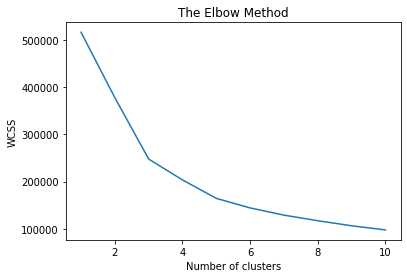

In [44]:
wcss = []
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_elbow.fit(df)
    wcss.append(kmeans_elbow.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here the choice of cluster is clearly 3 since it's the biggest gain that we have.

**3)** Use the same clustering algorithm used in 2) on your (normalized) data with the new value of
K

In [45]:
kmeans_new = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_new = kmeans_new.fit_predict(df)

**3.a)** How many observations are now in each cluster?

In [46]:
dic_3 = {}
for i in range(0,3):
    dic_3[i] = np.count_nonzero(y_kmeans_new == i)
dic_3

{0: 126147, 1: 58939, 2: 104}

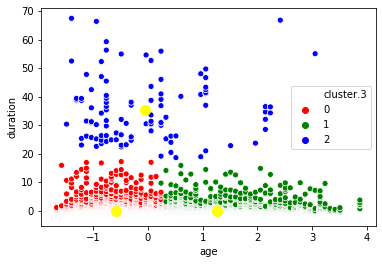

In [47]:
df['cluster.3'] = y_kmeans_new

color = ['red', 'green', 'blue']

sns.scatterplot(df['age'], df['duration'], hue = df['cluster.3'], palette = color)

plt.scatter(kmeans_new.cluster_centers_[0][[4,0]][0],kmeans_new.cluster_centers_[0][[4,0]][1] , marker='o', s=100, color = 'yellow')
plt.scatter(kmeans_new.cluster_centers_[1][[4,0]][0],kmeans_new.cluster_centers_[1][[4,0]][1] , marker='o', s=100, color = 'yellow')
plt.scatter(kmeans_new.cluster_centers_[2][[4,0]][0],kmeans_new.cluster_centers_[2][[4,0]][1] , marker='o', s=100, color = 'yellow')

With 3 clusters the plot has more sense. Infact we can say that the **'blue'** cluster can be considered the **'outlier cluster'** with only 104 observations. Then we have 2 cluster divided by age.

Now I want to see which is the **age border** between the 2 clusters. I will plot the cluster with the original dataset.

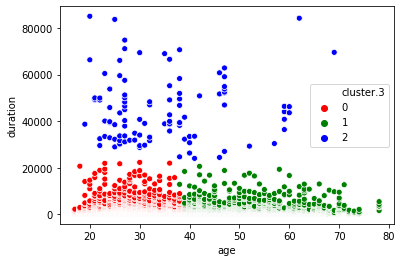

In [48]:
df = pd.read_csv("MarketSegmentation.csv")
df['cluster.3'] = y_kmeans_new

sns.scatterplot(df['age'], df['duration'], hue = df['cluster.3'], palette = color)

In [49]:
df[df['cluster.3'] == 0]['age'].max() 

40

So we have a cluster that goes from 17-40, and from 40-78 almost.

Let's see how the cluster divide themself in respect to **time**.

In [50]:
mor = np.array(df['morning'])
aft = np.array(df['afternoon'])
eve = np.array(df['evening'])
ct = pd.crosstab(y_kmeans_new, [mor, aft, eve], rownames = ['clusters'],
                       colnames = ['morning', 'afternoon', 'evening'])
ct

morning       0                    1
afternoon     0             1      0
evening       0      1      0      0
clusters                            
0          3984  37832  46698  37633
1           510   8374  27311  22744
2            12     58     12     22

From this table we can get some insights:
- there is a not negligible number of **'young'** that use the scooter **during the night (12.00am- 6.00am)**. (3984)
- the **'older'** seems to use the scooter mostly in the **morning** and in the **afternoon**.

Let's look at the **weekend usage**.

In [51]:
ct = pd.crosstab(y_kmeans_new, df['weekend_day'], rownames = ['clusters'],
                       colnames = ['weekend'])
ct

weekend,0,1
clusters,,
0,101344,24803
1,52258,6681
2,87,17


As we could expect the percentage of user in the weekend is higher from the **'young'** cluster: $19.6\%$, 
while the **'older'**: $11.3\%$

# The End